In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load dataset
data_df = pd.read_csv('../scholar.csv')

features = data_df.columns.tolist()
print(features)

input_features = features[0:3]
output_feature = features[3]
output_feature

['Sibs', 'Income', 'Grade', 'Approve']


'Approve'

In [4]:
data_df_x = data_df.drop(columns=['Approve'])
data_df_y = data_df[['Approve']]

In [5]:
# Fit the decision tree model to the iris data
dt_classifier = tree.DecisionTreeClassifier(random_state=4)
dt_classifier = dt_classifier.fit(data_df_x, data_df_y)

In [6]:
# Make predictions for a sample iris observation
prediction = dt_classifier.predict(data_df_x)
accuracy = dt_classifier.score(data_df_x, data_df_y)
conf_matrix = confusion_matrix(data_df_y, prediction)

print(accuracy)
print(conf_matrix)

1.0
[[7 0]
 [0 7]]


## Decision Tree Visualization

In [7]:
# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=features[0:3])
print(tree_text)

|--- Income <= 2.65
|   |--- Grade <= 2.95
|   |   |--- Sibs <= 3.50
|   |   |   |--- class: no
|   |   |--- Sibs >  3.50
|   |   |   |--- class: yes
|   |--- Grade >  2.95
|   |   |--- Grade <= 3.25
|   |   |   |--- Income <= 1.15
|   |   |   |   |--- class: yes
|   |   |   |--- Income >  1.15
|   |   |   |   |--- Income <= 1.55
|   |   |   |   |   |--- class: no
|   |   |   |   |--- Income >  1.55
|   |   |   |   |   |--- class: yes
|   |   |--- Grade >  3.25
|   |   |   |--- class: yes
|--- Income >  2.65
|   |--- class: no



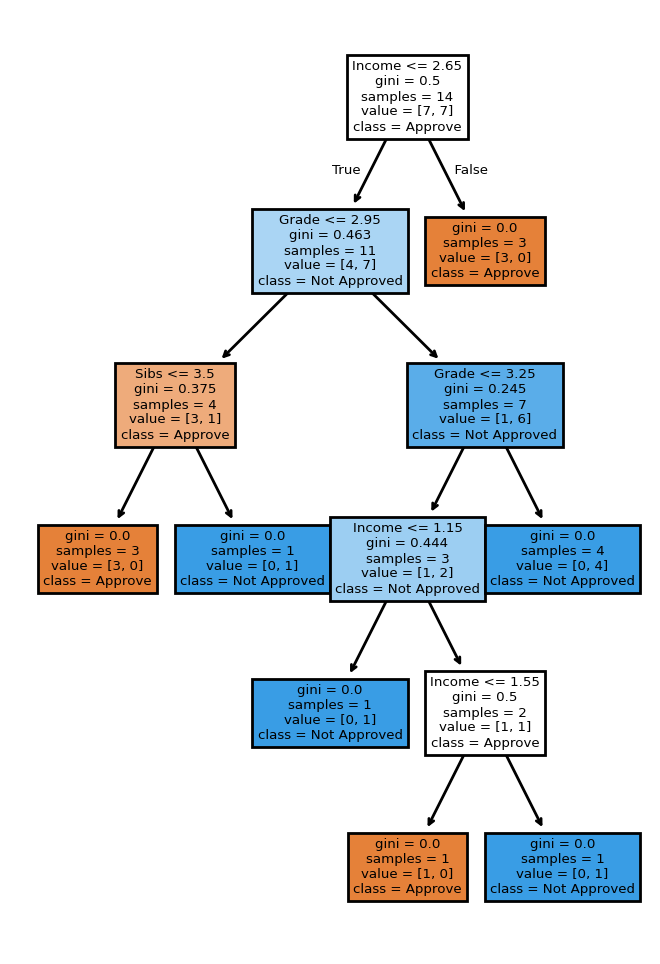

In [8]:
# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=input_features, class_names=['Approve', 'Not Approved'], ax=axes)
plt.show()